## Exemple d'apprentissage d'un réseau de neurones par héritage de la classe Model 

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense
tf.random.set_seed(1)

### Données d'apprentissage

In [2]:
# Définition des données d'apprentissage
X = np.array([[0,0], [0,1], [1,0], [1,1]])
Y = np.array([0,1,1,0])

train_ds = tf.data.Dataset.from_tensor_slices(
    (X, Y)).shuffle(10000).batch(1)

# ATTENTION : on utilise les données d'apprentissage en test
test_ds = tf.data.Dataset.from_tensor_slices(
(X, Y)).batch(1)

### Définition du réseau

In [3]:
# Tous les réseaux doivent hériter de la classe Model 
class XorModel(Model):

    # Dans le coinstructeur, on définit sa structure, i.e. les éléments constitutifs du graph
    def __init__(self):
        super(XorModel, self).__init__()
        self.fc1 = Dense(2, activation='sigmoid')
        self.fc2 = Dense(1, activation='sigmoid')
    
    # Définition des traitements des lors de la propagation d’un exemple x dans le réseaux
    # (i.e. la manière dont les éléments du graphe sont connectés)
    # A noter qu'il n'est pas necessaire de suivre l'ordre des opérations défini dans le constructeur.
    # Cette solution est donc beaucoup plus souple que le modél sequentiel précédent
    def call(self, x):
        x = self.fc1(x)
        x = self.fc2(x)
        return x

### Création d'une instance du réseau

In [4]:
xor_model = XorModel()

### Choix de la fonction de coût et de la méthode d'optimisation

In [5]:
loss_object = tf.keras.losses.MeanSquaredError()
sgd = tf.keras.optimizers.SGD(learning_rate=0.05, momentum=0.9)

### Définition de la fonction d'apprentissage qui sera applelée pour chaque step (pas) d'apprentissage (pour un batch)

In [6]:
@tf.function
def train_step(data, labels):
    with tf.GradientTape() as tape:
        # forward pass
        predictions = xor_model(data)
        loss = loss_object(labels, predictions)
    # calcul des gradients
    gradient = tape.gradient(loss, xor_model.trainable_variables)
    # retropropagation
    sgd.apply_gradients(zip(gradient, xor_model.trainable_variables))

### Boucle d'apprentissage

In [7]:
EPOCHS = 1000
for epoch in range(EPOCHS):
    for data, labels in train_ds:
        train_step(data, labels)

### On visualise les résultats (sur les données d'apprentissage)

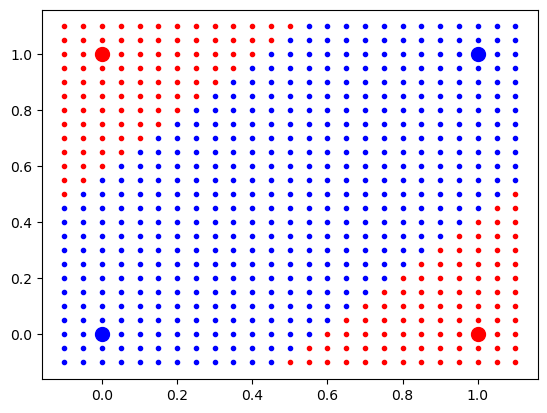

In [8]:
for i in np.arange(-0.1, 1.1, 0.05):
    for j in np.arange(-0.1, 1.1, 0.05):
        z = xor_model(np.array([[i,j]]))
        if z>0.5 :
            plt.plot(i,j,'.r')
        else :
            plt.plot(i,j, '.b')

# Affichage de la base d'apprentissage
for i in range(Y.size) :
    if Y[i] == 1 :
        fig = plt.plot(X[i,0], X[i,1], 'ro')
    else :
        fig = plt.plot(X[i, 0], X[i, 1], 'bo')
    plt.setp(fig, markersize=10)

plt.show()
